![header%20ipynb.png](attachment:header%20ipynb.png)

<div class="alert alert-block alert-danger">
<b>Package version :</b>
    <ol>
    <li>Tensorflow 2.4.1</li>
    <li>Keras 2.4.3</li>
    <li>Matplotlib 3.5.0</li>
    </ol>
</div>

In [1]:
## Just disables the warning, doesn't take advantage of AVX/FMA to run faster
# import os
# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [2]:
import keras
from keras.datasets import mnist
from keras.utils import to_categorical

(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


11490434/11490434 [==============================] - 0s 0us/step


In [3]:
#model1 menggunakan Multilayer Neural Network

from keras.models import Sequential
from keras.layers import Flatten, Dense

model1 = Sequential()
model1.add(Flatten())
model1.add(Dense(64,activation='relu'))
model1.add(Dense(10,activation='softmax'))

In [4]:
model1.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['acc'])
history1 = model1.fit(X_train,y_train,epochs=10,batch_size=100,validation_data=(X_test,y_test))

Epoch 1/10
600/600 [==============================] - 8s 4ms/step - loss: 0.3893 - acc: 0.8948 - val_loss: 0.2161 - val_acc: 0.9385
Epoch 2/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1902 - acc: 0.9461 - val_loss: 0.1629 - val_acc: 0.9519
Epoch 3/10
600/600 [==============================] - 2s 3ms/step - loss: 0.1431 - acc: 0.9589 - val_loss: 0.1318 - val_acc: 0.9619
Epoch 4/10
600/600 [==============================] - 3s 5ms/step - loss: 0.1145 - acc: 0.9677 - val_loss: 0.1186 - val_acc: 0.9641
Epoch 5/10
600/600 [==============================] - 2s 4ms/step - loss: 0.0961 - acc: 0.9722 - val_loss: 0.1036 - val_acc: 0.9692
Epoch 6/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0829 - acc: 0.9760 - val_loss: 0.0917 - val_acc: 0.9710
Epoch 7/10
600/600 [==============================] - 2s 3ms/step - loss: 0.0725 - acc: 0.9791 - val_loss: 0.0950 - val_acc: 0.9707
Epoch 8/10
600/600 [==============================] - 2s 3ms/step - loss: 0.

In [5]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (100, 784)                0         
                                                                 
 dense (Dense)               (100, 64)                 50240     
                                                                 
 dense_1 (Dense)             (100, 10)                 650       
                                                                 
Total params: 50890 (198.79 KB)
Trainable params: 50890 (198.79 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [6]:
model1.evaluate(X_test,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0857 - acc: 0.9744


[0.08571528643369675, 0.974399983882904]

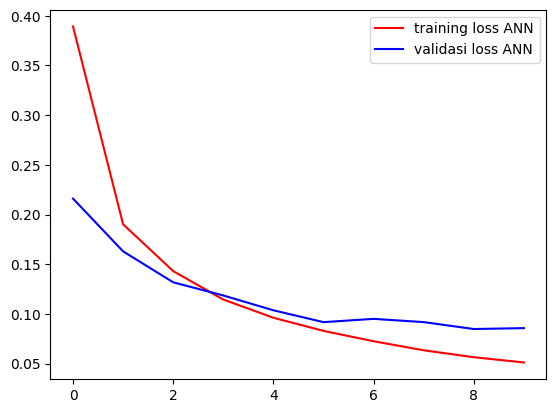

In [7]:
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

epochs = range(10)

loss1 = history1.history['loss']
val_loss1 = history1.history['val_loss']

plt.plot(epochs,loss1,'r',label='training loss ANN')
plt.plot(epochs,val_loss1,'b',label='validasi loss ANN')
plt.legend()

In [8]:
import numpy as np

pred = model1.predict(X_test)
print('label actual:',np.argmax(y_test[30]))
print('label prediction:',np.argmax(pred[30]))

313/313 [==============================] - 2s 5ms/step
label actual: 3
label prediction: 3
